In [ ]:
!unzip colorized-MNIST-Updated.zip

In [ ]:
!unzip trainingSample.zip

In [ ]:
import cv2
#globbing utility.
import glob
import torchvision.transforms as transforms




def dataProcess(filename,img_type):
  mainList_features = []
  mainList_label = []

  for i in range(10):
    path = filename+'/'+str(i)+"/"+'*.'+img_type
    print(path)
    path = glob.glob(path)

    print(path)

    for file in path:
      
    # Read the image
        image = cv2.imread(file)

      
      

        mainList_features.append(image.reshape(2352))
        mainList_label.append(i)
        

        
    

  return mainList_features, mainList_label

colored_train_features, colored_train_labels = dataProcess('/content/colorized-MNIST-Updated/training',"png")

colored_test_features,colored_test__labels = dataProcess('/content/colorized-MNIST-Updated/testing',"png")

normal_features, normal_labels = dataProcess('/content/trainingSample',"jpg")
      
    
 

/content/colorized-MNIST-Updated/training/0/*.png
['/content/colorized-MNIST-Updated/training/0/blue_2473.png', '/content/colorized-MNIST-Updated/training/0/purple_12.png', '/content/colorized-MNIST-Updated/training/0/purple_52.png', '/content/colorized-MNIST-Updated/training/0/purple_725.png', '/content/colorized-MNIST-Updated/training/0/purple_286.png', '/content/colorized-MNIST-Updated/training/0/purple_859.png', '/content/colorized-MNIST-Updated/training/0/purple_688.png', '/content/colorized-MNIST-Updated/training/0/green_2532.png', '/content/colorized-MNIST-Updated/training/0/blue_2974.png', '/content/colorized-MNIST-Updated/training/0/purple_247.png', '/content/colorized-MNIST-Updated/training/0/purple_483.png', '/content/colorized-MNIST-Updated/training/0/blue_4415.png', '/content/colorized-MNIST-Updated/training/0/blue_4289.png', '/content/colorized-MNIST-Updated/training/0/purple_662.png', '/content/colorized-MNIST-Updated/training/0/red_7247.png', '/content/colorized-MNIST-U

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
normal_train_len = int(len(normal_features)*0.7)

normal_train_features = normal_features[0:normal_train_len]
normal_test_features = normal_features[normal_train_len:]

normal_train_labels = normal_labels[0:normal_train_len]
normal_test_labels = normal_labels[normal_train_len:]


In [ ]:


print(len(normal_train_features))
print(len(normal_test_features))

print(len(normal_train_labels))
print(len(normal_test_labels))

29399
12601
29399
12601


In [ ]:
train_all_features = colored_train_features + normal_train_features

train_all_labels = colored_train_labels + normal_train_labels





[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

In [ ]:
#Applying the GNB and getting the accuracy and confusion matrix

import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

# Import label encoder
from sklearn import preprocessing


from sklearn.preprocessing import MinMaxScaler

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

sc_X = MinMaxScaler()

test_labels = normal_test_labels
pediction_needs = normal_test_features


def fileReading_and_modellearning(train_all_features,train_all_labels):
    

  # Initialize our classifier
    print("gnb")
    gnb = GaussianNB()

      # Train our classifier
    model = gnb.fit(train_all_features, train_all_labels)
    preds = gnb.predict(pediction_needs)
    
    

    print(train_all_labels.count(0))
    print(train_all_labels.count(1))
    print(train_all_labels.count(2))
    print(train_all_labels.count(3))
    print(train_all_labels.count(4))
    print(train_all_labels.count(5))
    print(train_all_labels.count(6))
    print(train_all_labels.count(7))
    print(train_all_labels.count(8))
    print(train_all_labels.count(9))
    

      
      # Evaluate accurac
    
    print("accuracy gnb")
    print(accuracy_score(test_labels, preds))
    print(f1_score(test_labels, preds, average = 'micro'))
    
    
    print("mnb")
    gnb = MultinomialNB()

      # Train our classifier
    model = gnb.fit(train_all_features, train_all_labels)
    preds = gnb.predict(pediction_needs)
    
    #test_labels = list(test_labels)

    print(test_labels.count(0))
    print(test_labels.count(1))
    print(test_labels.count(2))
    print(test_labels.count(3))

      
      # Evaluate accurac
    
    print("accuracy mnb")
    print(accuracy_score(test_labels, preds))
    print(f1_score(test_labels, preds, average = 'micro'))
    
    
    print("cnb")
    gnb = ComplementNB()

      # Train our classifier
    model = gnb.fit(train_all_features, train_all_labels)
    preds = gnb.predict(pediction_needs)
    
    #test_labels = list(test_labels)

    print(test_labels.count(0))
    print(test_labels.count(1))
    print(test_labels.count(2))
    print(test_labels.count(3))

      
      # Evaluate accurac
    
    print("accuracy cnb")
    print(accuracy_score(test_labels, preds))
    print(f1_score(test_labels, preds, average = 'micro'))



print('train_all_orginal_test_features')
fileReading_and_modellearning(train_all_features,train_all_labels)

train_all_orginal_test_features
gnb
5868
6684
5893
6169
5838
5323
5923
1947
1670
1754
accuracy gnb
0.0
0.0
mnb
0
0
0
0
accuracy mnb
0.005158320768193001
0.005158320768193001
cnb
0
0
0
0
accuracy cnb
0.0
0.0


In [ ]:
# Import the necessary libraries
from PIL import Image
from numpy import asarray
import numpy as np

# load the image and convert into
# numpy array
img0 = Image.open('img_1.jpg')
img0_counter = Image.open('zero_counterfactual.png')


numpydata0 = np.array(img0)

# <class 'numpy.ndarray'>
print(type(numpydata0))

# shape
print(numpydata0.shape)




numpydata0_c = np.array(img0_counter)

# <class 'numpy.ndarray'>
print(type(numpydata0_c))

# shape
numpydata0_c=numpydata0_c.reshape(4,28,28)

lll = []
#numpydata0 = numpydata0_c[0]
for i in range(len(numpydata0)):
  il = []
  for j in range(len(numpydata0[i])):
    il.append(numpydata0[i][j])
  
  lll.append(il)


for l in lll:
  print(l)

<class 'numpy.ndarray'>
(28, 28)
<class 'numpy.ndarray'>
[3, 0, 0, 3, 7, 3, 0, 3, 0, 11, 0, 0, 3, 0, 0, 3, 8, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 12, 0, 16, 0, 0, 4, 0, 2, 8, 3, 0, 4, 8, 0, 0, 0, 0, 0]
[0, 0, 2, 0, 0, 0, 1, 2, 1, 12, 0, 8, 0, 0, 6, 0, 11, 0, 0, 6, 7, 2, 0, 0, 0, 0, 0, 0]
[0, 1, 3, 0, 0, 2, 3, 0, 0, 0, 12, 0, 0, 23, 0, 0, 0, 0, 11, 3, 0, 0, 4, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 2, 0, 0, 6, 0, 25, 27, 136, 135, 188, 89, 84, 25, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 3, 88, 247, 236, 255, 249, 250, 227, 240, 136, 37, 1, 0, 2, 2, 0, 0, 0, 0, 0]
[2, 0, 0, 3, 0, 0, 4, 27, 193, 251, 253, 255, 255, 255, 255, 240, 254, 255, 213, 89, 0, 0, 14, 1, 0, 0, 0, 0]
[0, 0, 0, 6, 0, 0, 18, 56, 246, 255, 253, 243, 251, 255, 245, 255, 255, 254, 255, 231, 119, 7, 0, 5, 0, 0, 0, 0]
[4, 0, 0, 12, 13, 0, 65, 190, 246, 255, 255, 251, 255, 109, 88, 199, 255, 247, 250, 255, 234, 92, 0, 0, 0, 0, 0, 0]
[0, 10, 1, 0, 0, 18, 163, 248, 255, 235, 216, 150, 128, 4

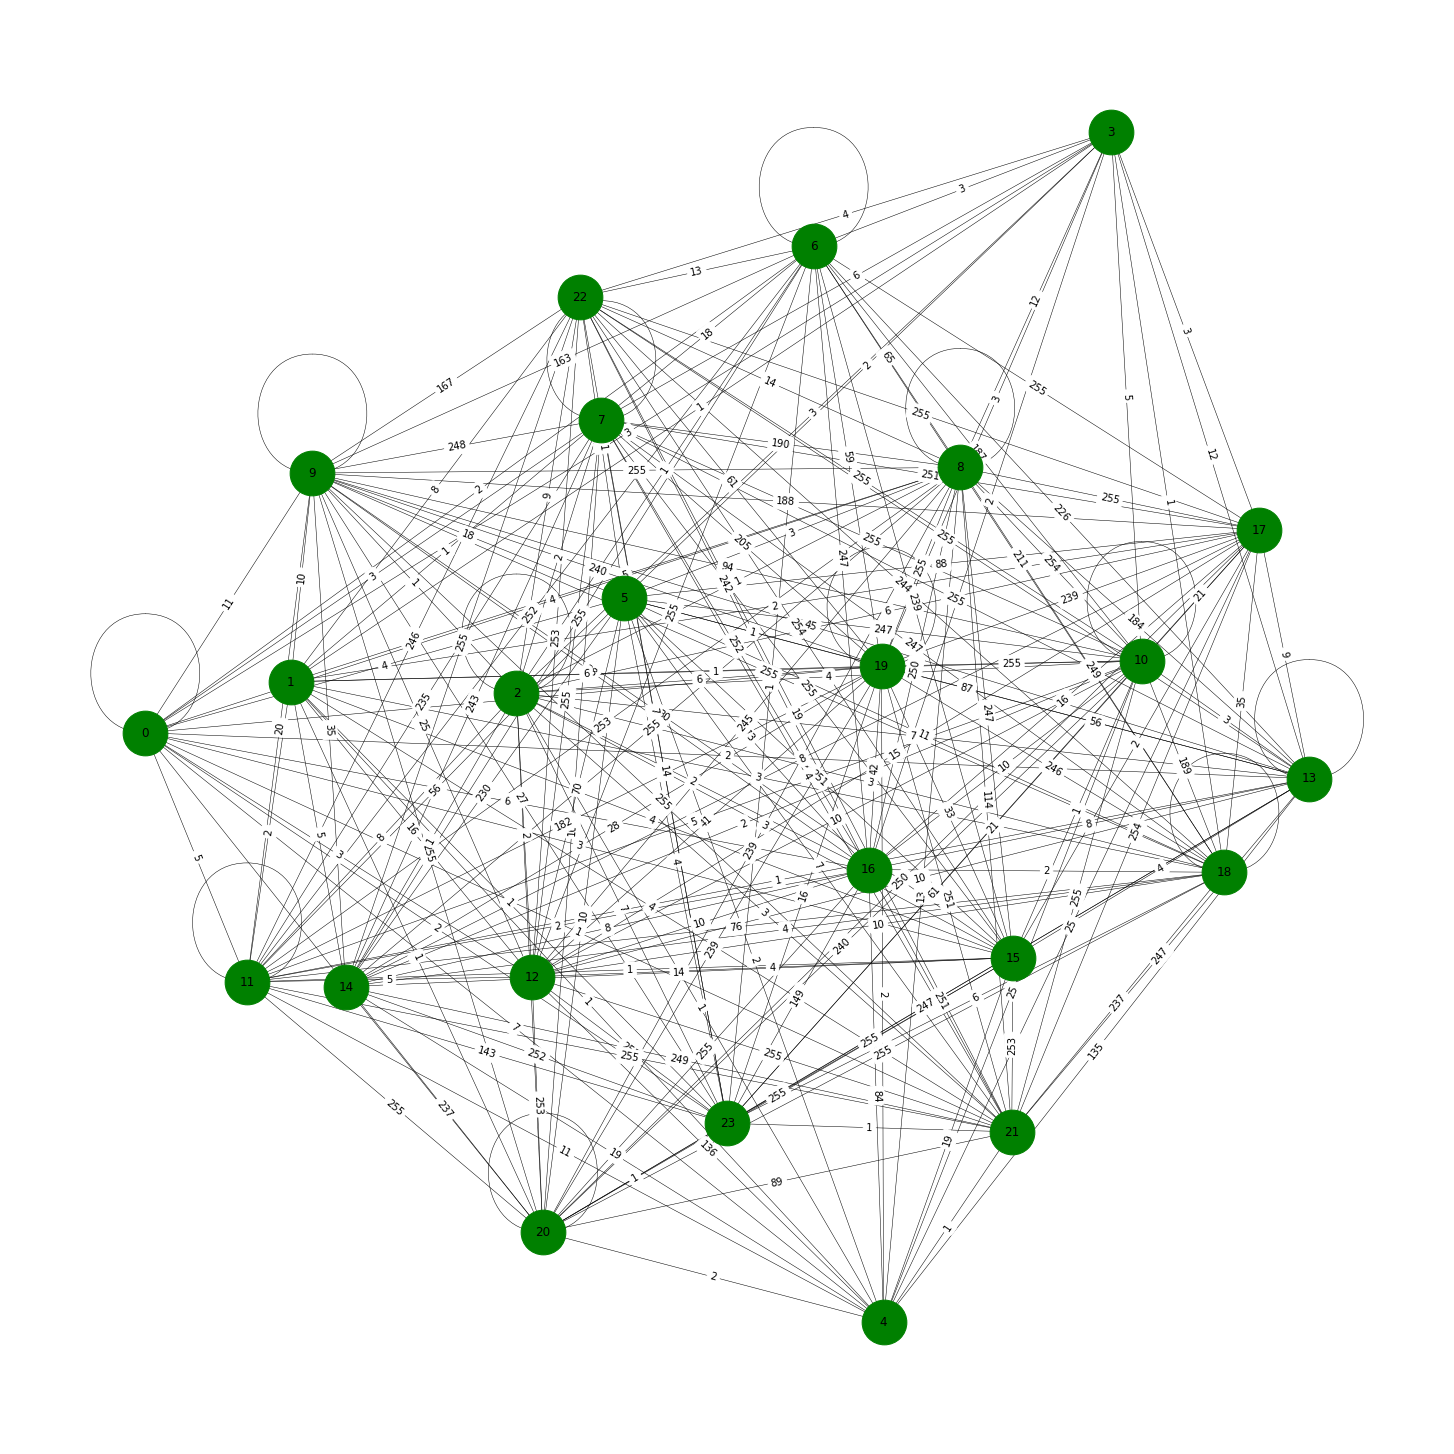

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


G = nx.Graph()
for i in range(len(lll)):
  for j in range(len(lll[i])):
    if(lll[i][j]>0):
      G.add_edge(i, j, weight=lll[i][j])



plt.figure(figsize=(20,20))

pos = nx.nx_pydot.graphviz_layout(G)
nx.draw(G, pos, node_size = 2000, with_labels= True, width = .5, node_color='Green')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.savefig("graphAttackfree.png", bbox_inches = "tight")

